In [235]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [236]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [237]:
fetch_housing_data()

In [238]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [239]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Create a Test Set

In [240]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [241]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [242]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [243]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [244]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [245]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Prepare the Data for Machine Learning Algorithms

In [246]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [247]:
# X_train = strat_train_set[["longitude", "latitude", "median_income"]].copy()
# X_test = strat_train_set[["longitude", "latitude", "median_income"]].copy()

In [248]:
X_train = train_set[["longitude", "latitude", "median_income"]].copy()
X_test = test_set[["longitude", "latitude", "median_income"]].copy()

In [249]:
X_train

,longitude,latitude,median_income
14196,-117.03,32.71,3.2596
8267,-118.16,33.77,3.8125
17445,-120.48,34.66,4.1563
14265,-117.11,32.69,1.9425
2271,-119.80,36.78,3.5542
...,...,...,...
11284,-117.96,33.78,6.3700
11964,-117.43,34.02,3.0500
5390,-118.38,34.03,2.9344
860,-121.96,37.58,5.7192


## scaled

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.fit_transform(X_test)  

## Train k means

In [251]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_train_scaled)

cluster_labels = kmeans.predict(X_train_scaled)

print(cluster_labels)

[8 1 7 ... 3 0 4]


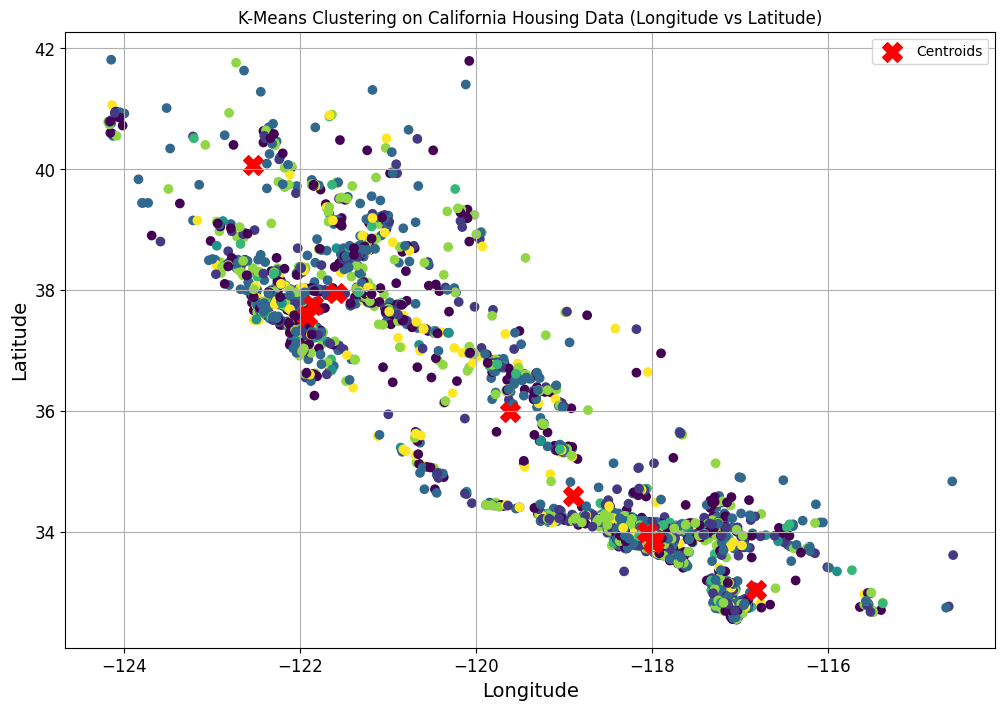

In [252]:
import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


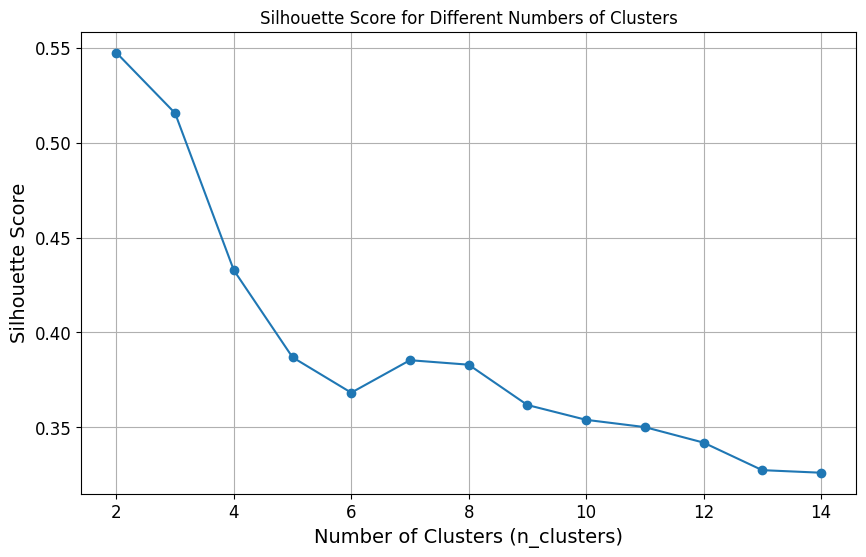

In [270]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Range of cluster numbers to evaluate
cluster_range = range(2, 15)
silhouette_scores = []

# Calculate silhouette score for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    cluster_labels = kmeans.predict(X_train_scaled)
    score = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


In [271]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)


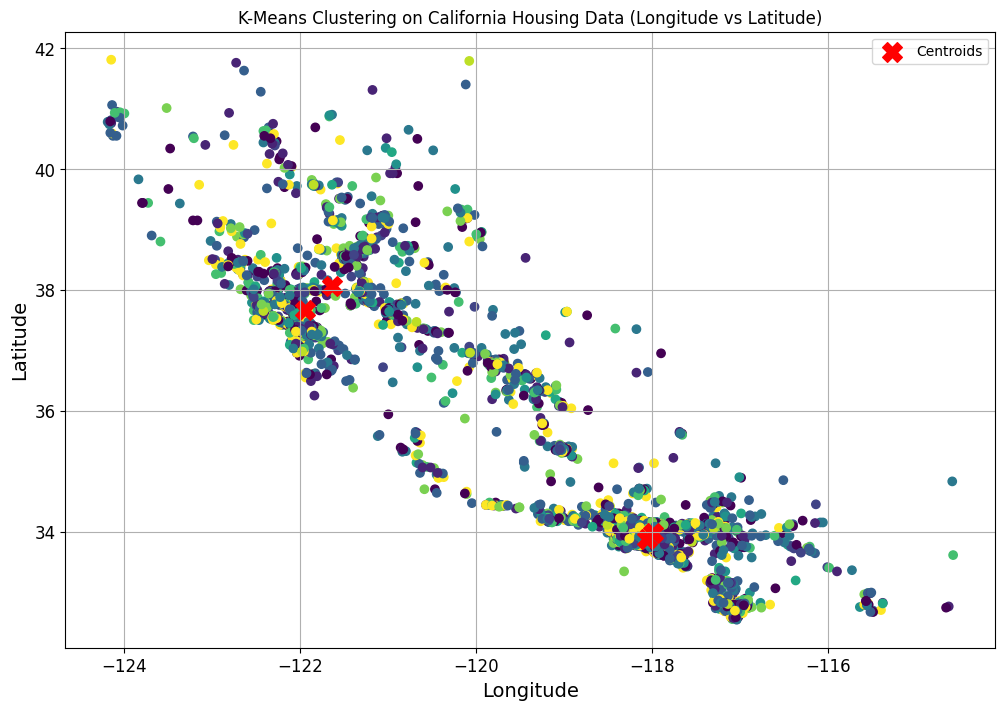

In [272]:
import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

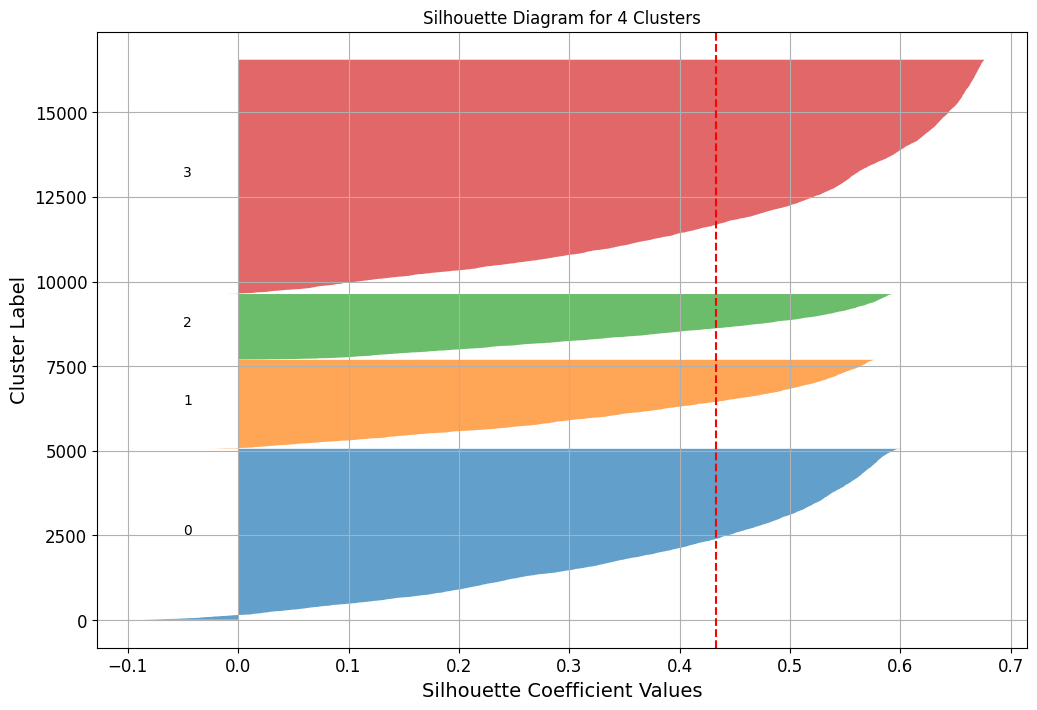

In [273]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train_scaled)
cluster_labels_optimal = kmeans_optimal.predict(X_train_scaled)

# Calculate the silhouette values for each sample
silhouette_values = silhouette_samples(X_train_scaled, cluster_labels_optimal)

# Plotting the silhouette diagram
plt.figure(figsize=(12, 8))
y_lower = 10
for i in range(optimal_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[cluster_labels_optimal == i]
    ith_cluster_silhouette_values.sort()
    
    # Compute the y_upper for this cluster
    y_upper = y_lower + len(ith_cluster_silhouette_values)
    
    # Fill the silhouette values for this cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_values), str(i))
    
    # Update the y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples gap between plots

# Draw a vertical line for the average silhouette score of all the values
average_score = silhouette_score(X_train_scaled, cluster_labels_optimal)
plt.axvline(x=average_score, color="red", linestyle="--")

plt.title(f'Silhouette Diagram for {optimal_clusters} Clusters')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.grid()
plt.show()


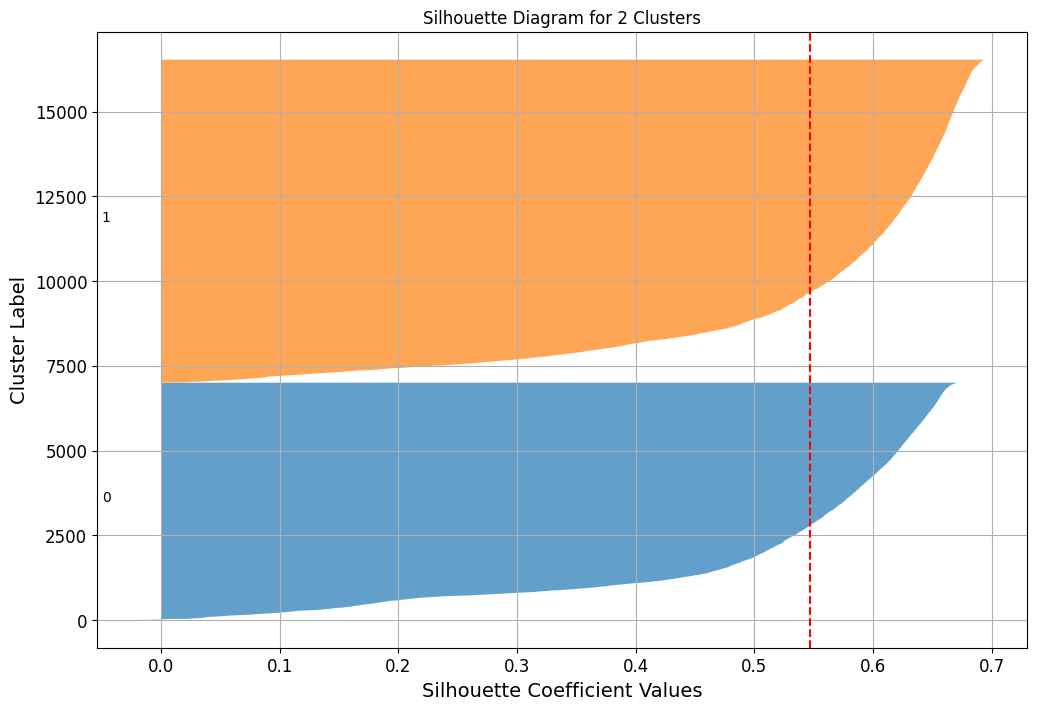

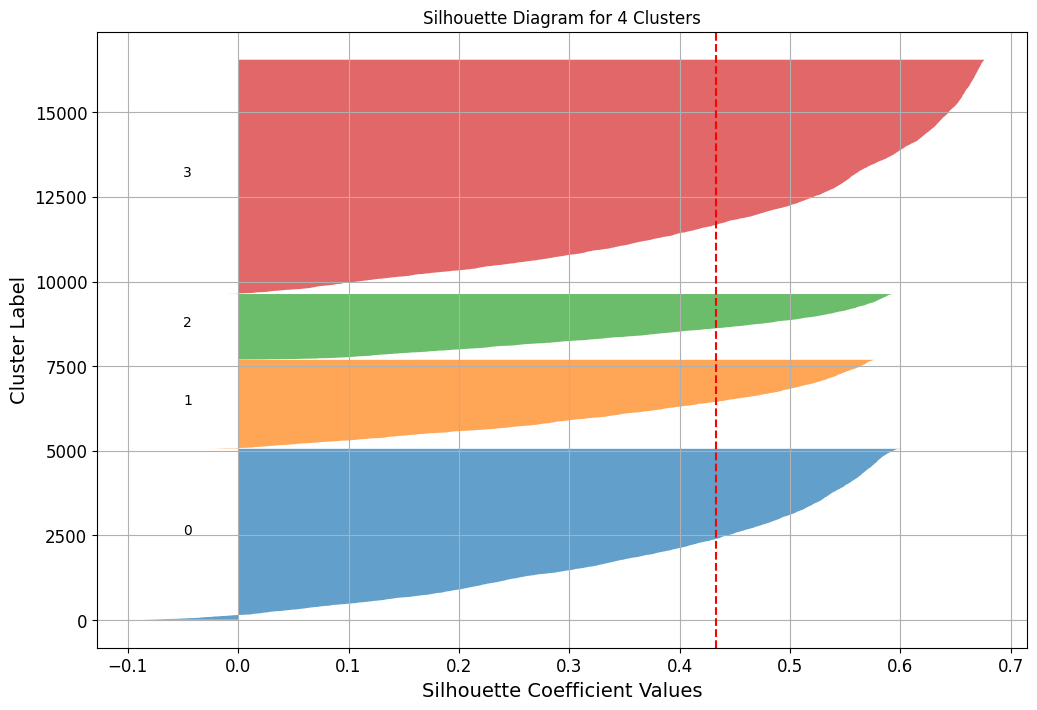

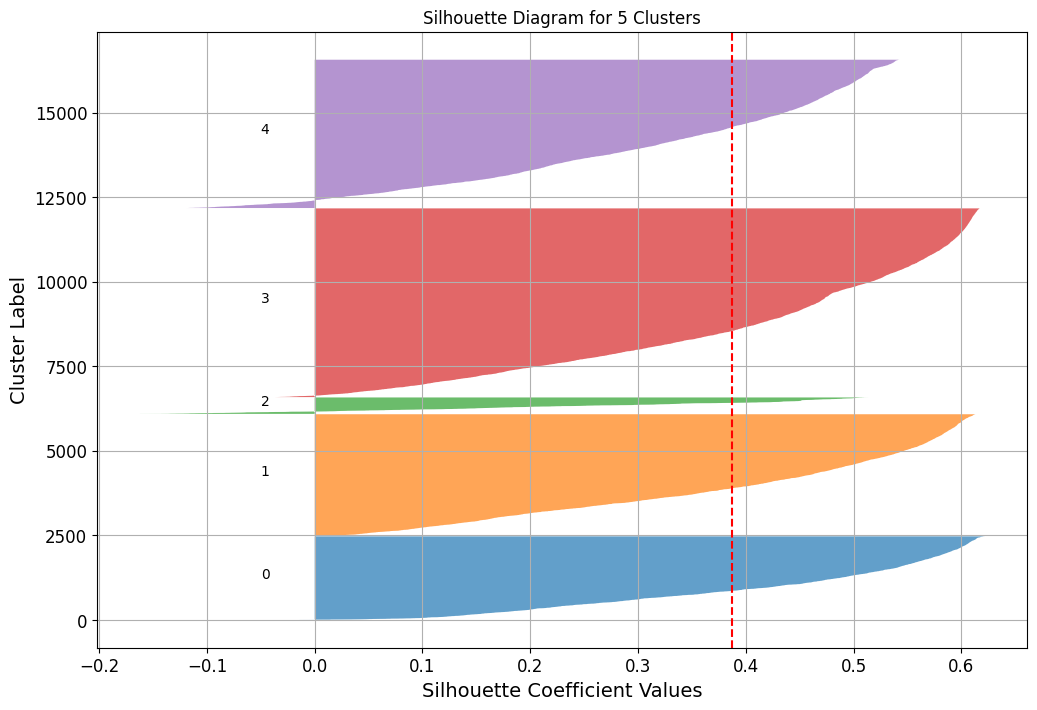

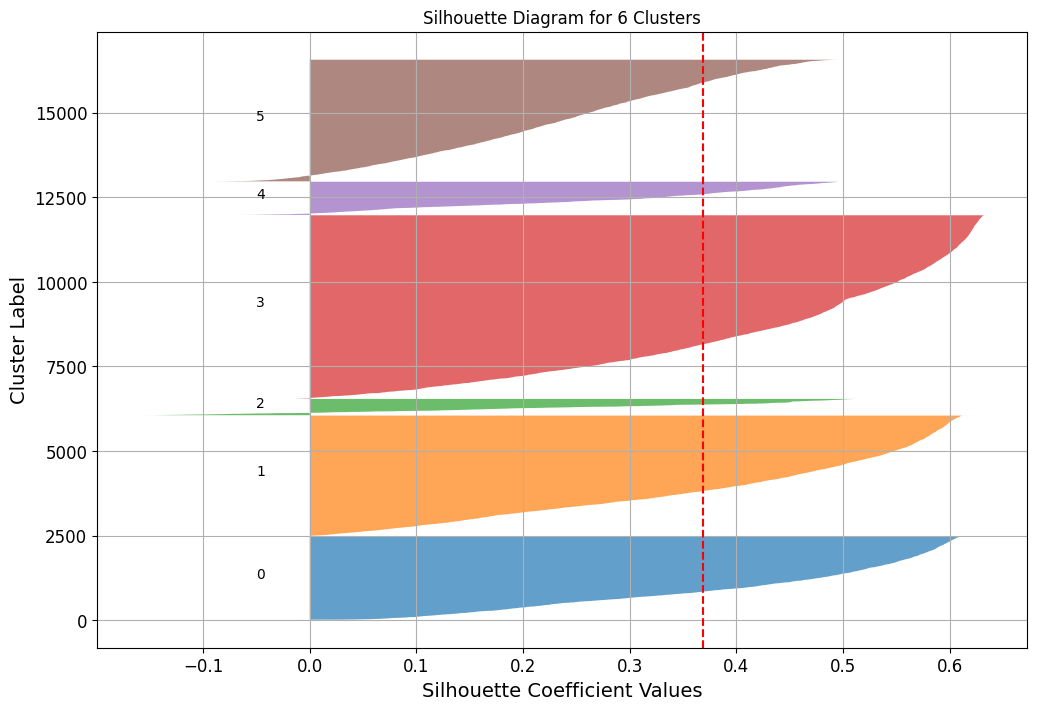

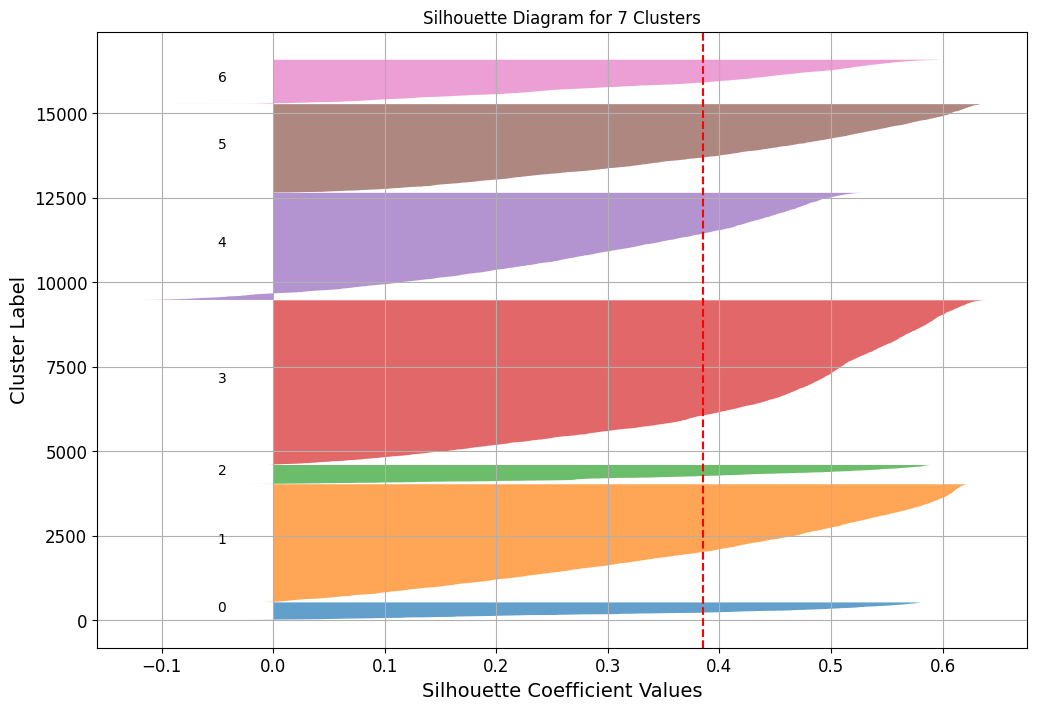

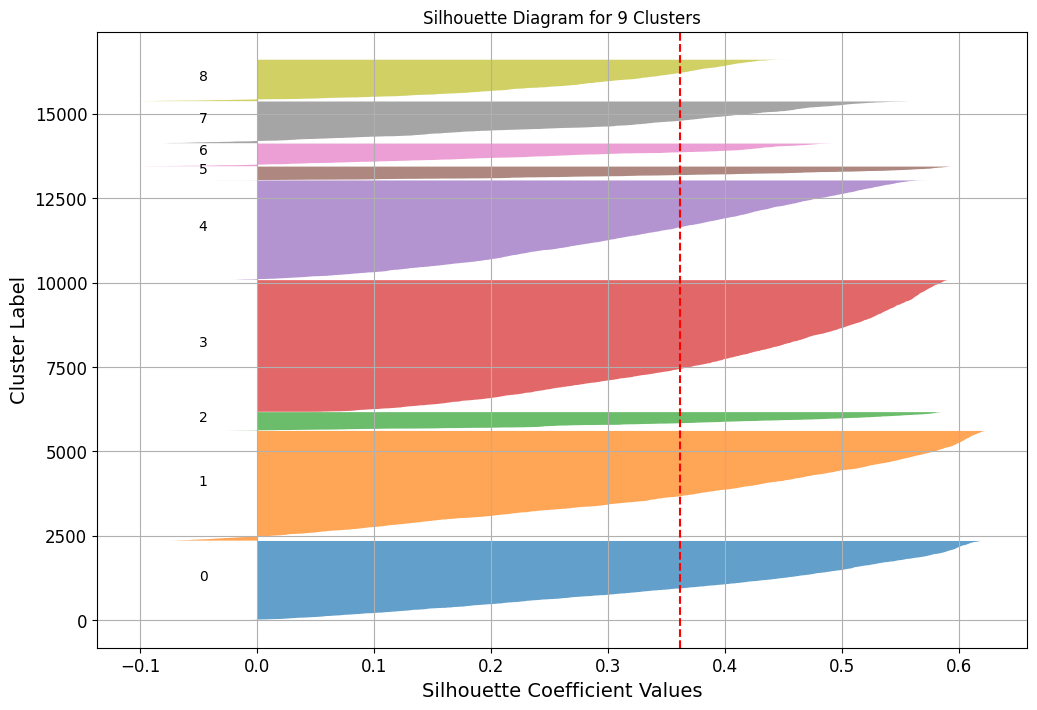

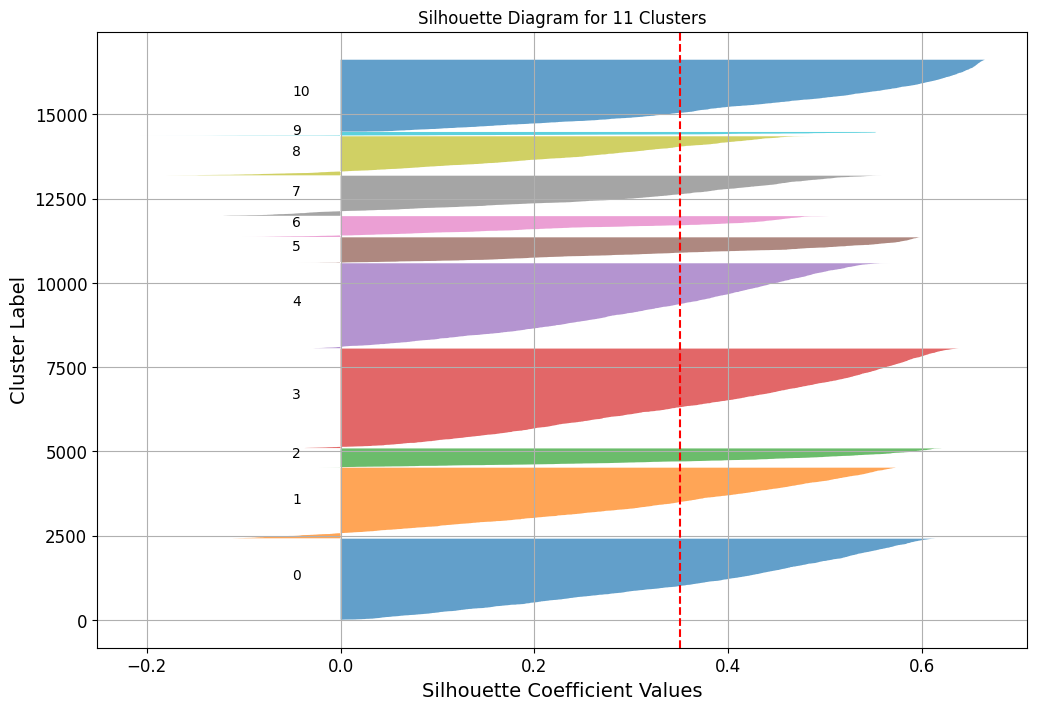

In [283]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# List of cluster numbers to test
optimal_clusters = [2, 4,5,6, 7, 9, 11]

# Plot silhouette diagrams for each number of clusters
for n_clusters in optimal_clusters:
    # Fit K-Means with the current number of clusters
    kmeans_optimal = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_optimal.fit(X_train_scaled)
    cluster_labels_optimal = kmeans_optimal.predict(X_train_scaled)

    # Calculate the silhouette values for each sample
    silhouette_values = silhouette_samples(X_train_scaled, cluster_labels_optimal)

    # Plotting the silhouette diagram
    plt.figure(figsize=(12, 8))
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = silhouette_values[cluster_labels_optimal == i]
        ith_cluster_silhouette_values.sort()

        # Compute the y_upper for this cluster
        y_upper = y_lower + len(ith_cluster_silhouette_values)

        # Fill the silhouette values for this cluster
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_values), str(i))

        # Update the y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between plots

    # Draw a vertical line for the average silhouette score of all the values
    average_score = silhouette_score(X_train_scaled, cluster_labels_optimal)
    plt.axvline(x=average_score, color="red", linestyle="--")

    # Set titles and labels
    plt.title(f'Silhouette Diagram for {n_clusters} Clusters')
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster Label')
    plt.grid()
    plt.show()


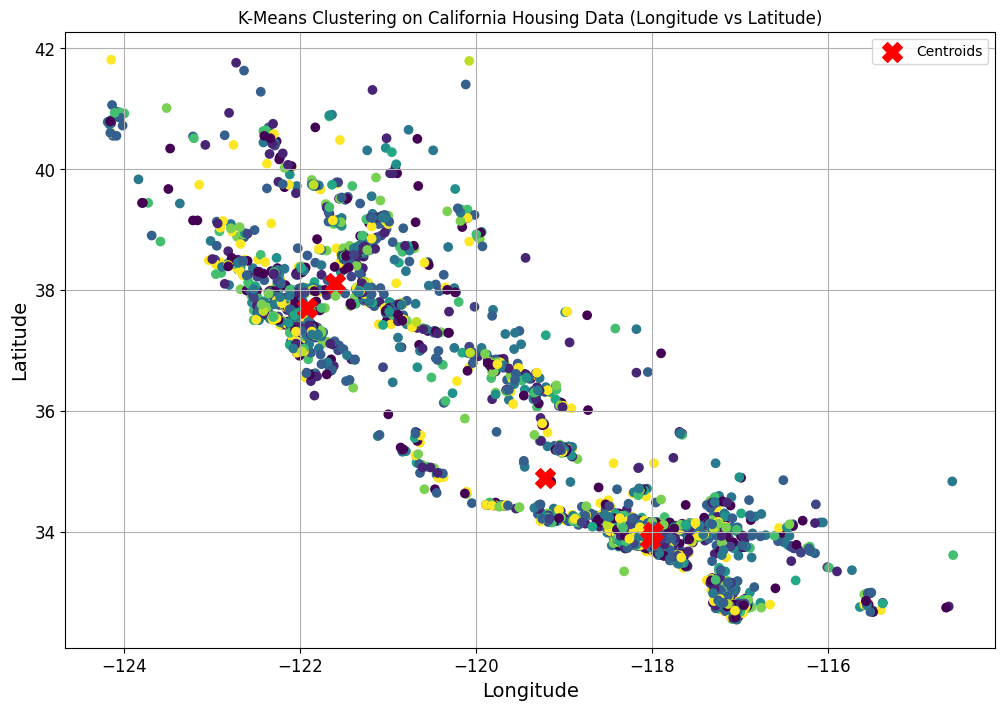

In [295]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)

import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

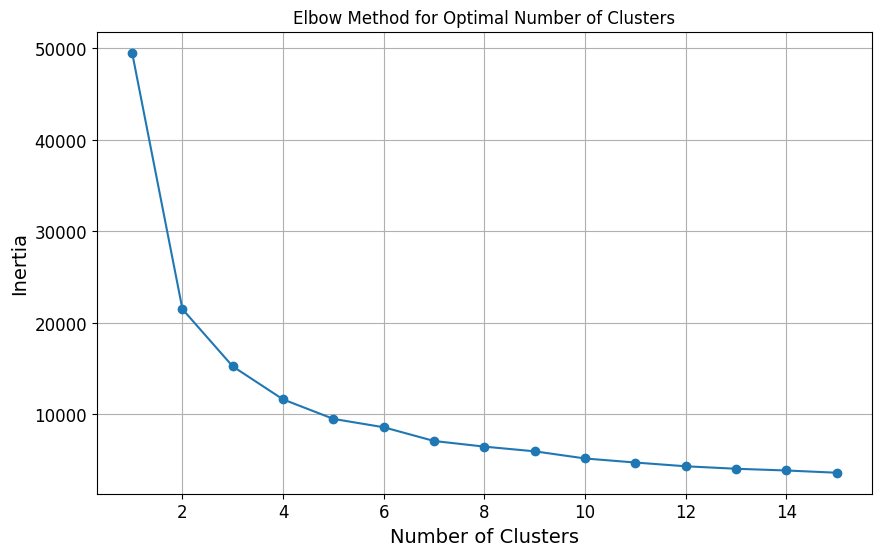

In [258]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

cluster_range = range(1, 16)
inertias = []

# Calculate the inertia for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)  # Use your scaled data
    inertias.append(kmeans.inertia_)

# Plot the inertia for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


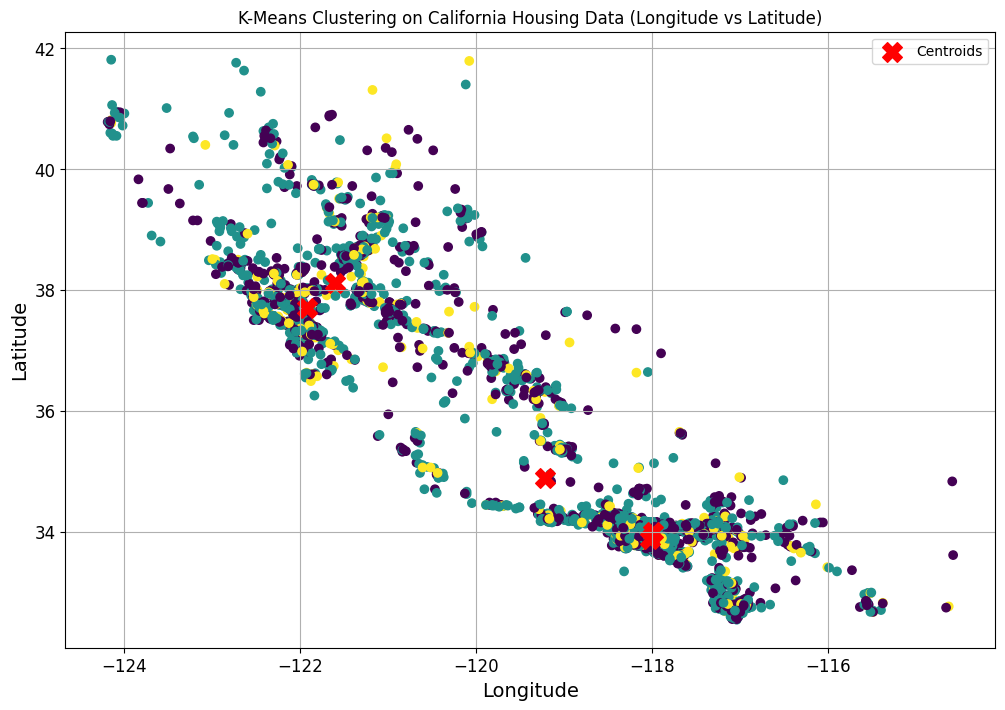

In [267]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)

import matplotlib.pyplot as plt

# Transform the cluster centers back to the original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering on California Housing Data (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

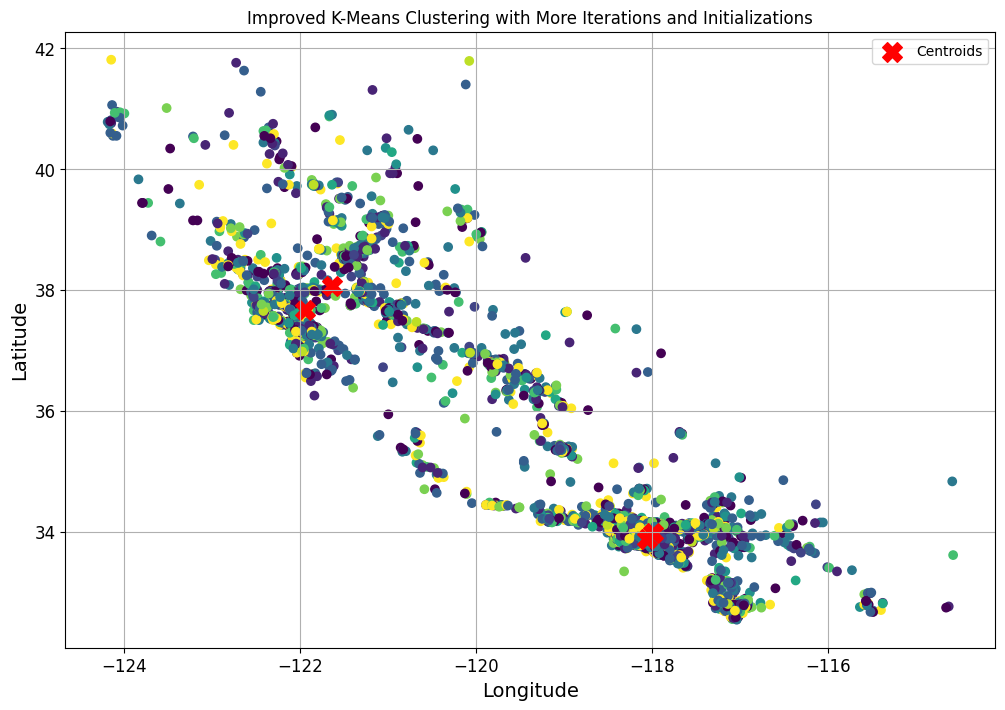

In [284]:
from sklearn.cluster import KMeans

# Increase the number of iterations and restarts
kmeans = KMeans(
    n_clusters=4,        # Number of clusters as determined by the Elbow Method
    max_iter=5000,        # Increase maximum number of iterations
    n_init=20,           # Increase the number of initializations to choose the best one
    random_state=42      # Ensure reproducibility
)

# Fit the model
kmeans.fit(X_train_scaled)

# Predict cluster labels
cluster_labels = kmeans.predict(X_train_scaled)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Optional: Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Improved K-Means Clustering with More Iterations and Initializations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


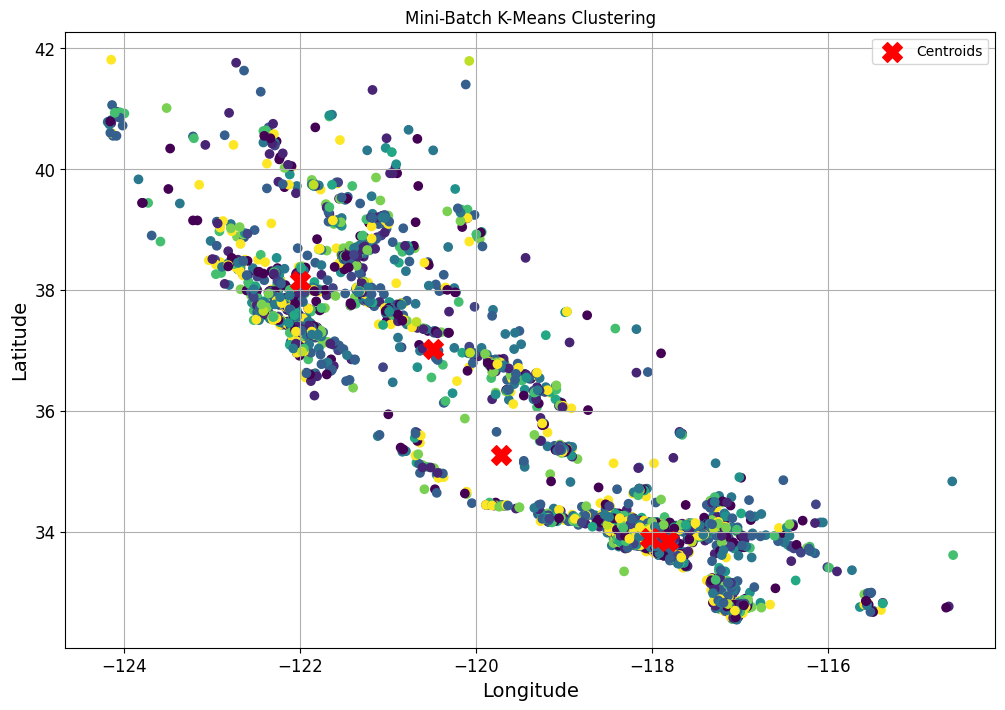

In [293]:
from sklearn.cluster import MiniBatchKMeans

# Initialize Mini-Batch K-Means with the same number of clusters and parameters
minibatch_kmeans = MiniBatchKMeans(
    n_clusters=5,         # Number of clusters
    max_iter=5000,         # Maximum number of iterations
    batch_size=100,       # Size of the mini-batches
    n_init=20,            # Number of initializations
)

# Fit the Mini-Batch K-Means model
minibatch_kmeans.fit(X_train_scaled)

# Predict the cluster labels
minibatch_cluster_labels = minibatch_kmeans.predict(X_train_scaled)
centroids_original = scaler.inverse_transform(minibatch_kmeans.cluster_centers_)


# Plot the clusters
plt.figure(figsize=(12, 8))
plt.scatter(X_test["longitude"], X_test["latitude"], c=labels[:len(X_test)], cmap='viridis')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Mini-Batch K-Means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()


In [264]:
print(f'Inertia for Standard K-Means: {kmeans.inertia_:.2f}')

print(f'Inertia for Mini-Batch K-Means: {minibatch_kmeans.inertia_:.2f}')

Inertia for Standard K-Means: 9509.21
Inertia for Mini-Batch K-Means: 9576.20


In [265]:
from sklearn.metrics import silhouette_score

# Silhouette score for standard K-Means
kmeans_silhouette = silhouette_score(X_train_scaled, cluster_labels)
print(f'Silhouette Score for Standard K-Means: {kmeans_silhouette:.3f}')

# Silhouette score for Mini-Batch K-Means
minibatch_silhouette = silhouette_score(X_train_scaled, minibatch_cluster_labels)
print(f'Silhouette Score for Mini-Batch K-Means: {minibatch_silhouette:.3f}')


Silhouette Score for Standard K-Means: 0.387
Silhouette Score for Mini-Batch K-Means: 0.382


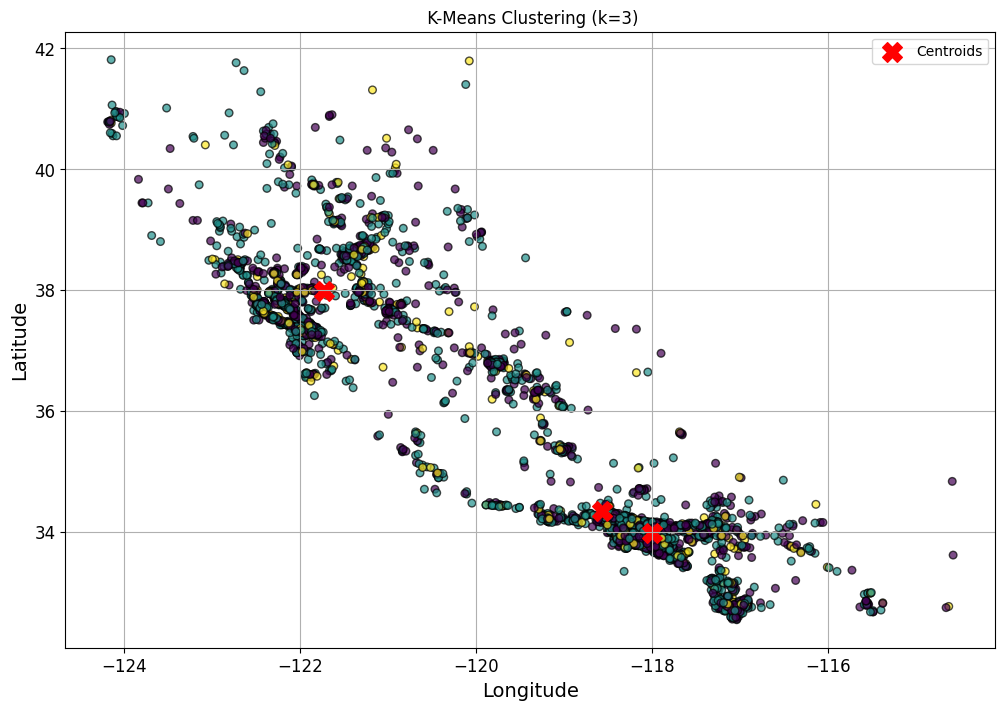


Cluster Distribution for k=3:
cluster
0    1647
1    1985
2     496
Name: count, dtype: int64

Cluster Feature Means for k=3:
          longitude   latitude  median_income
cluster                                      
0       -119.448834  35.566897       3.765479
1       -119.586222  35.617461       3.818730
2       -119.485968  35.529435       4.092162


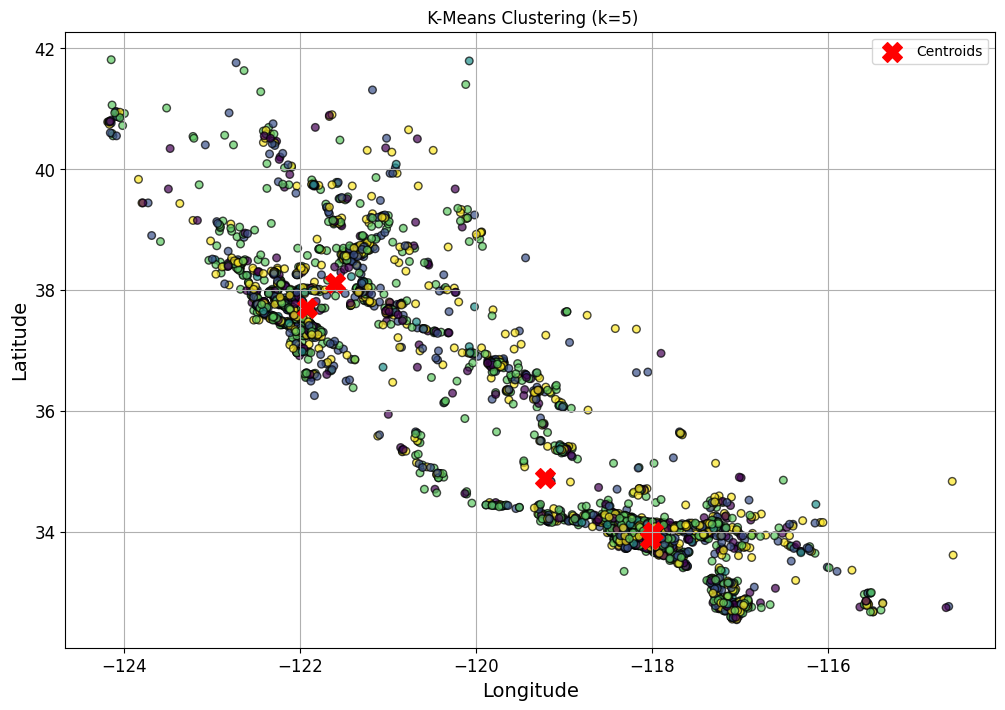


Cluster Distribution for k=5:
cluster
0     614
1     909
2     132
3    1413
4    1060
Name: count, dtype: int64

Cluster Feature Means for k=5:
          longitude   latitude  median_income
cluster                                      
0       -119.441042  35.542948       3.707094
1       -119.545897  35.581177       3.845687
2       -119.406515  35.458409       4.409926
3       -119.598613  35.630340       3.848085
4       -119.450377  35.574623       3.792732


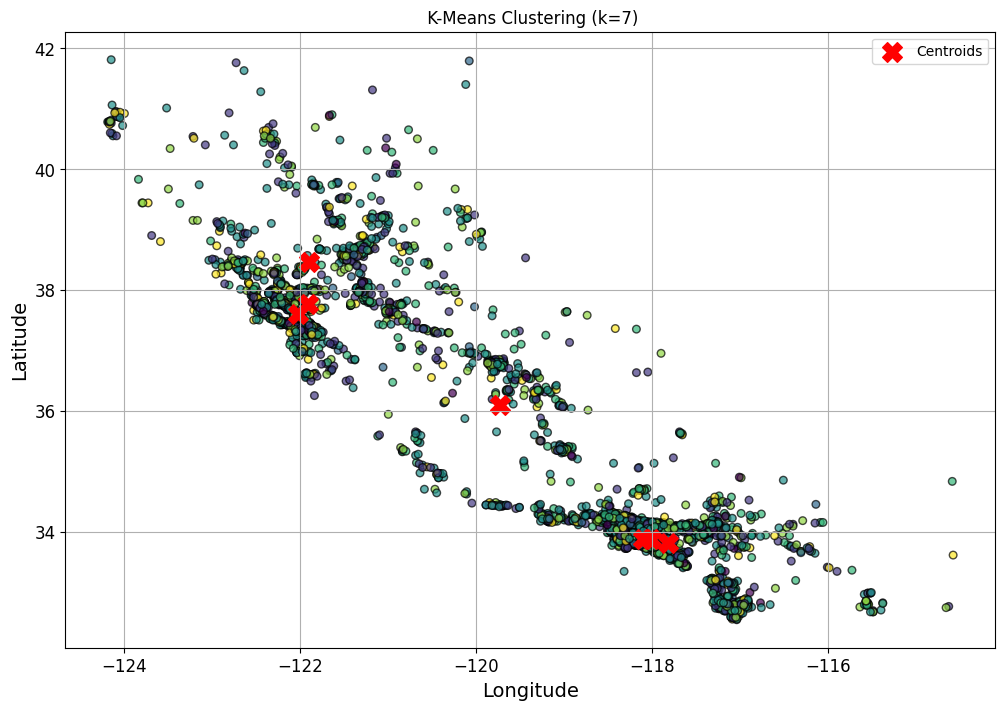


Cluster Distribution for k=7:
cluster
0     128
1     889
2     143
3    1233
4     758
5     662
6     315
Name: count, dtype: int64

Cluster Feature Means for k=7:
          longitude   latitude  median_income
cluster                                      
0       -119.294453  35.340938       3.869273
1       -119.523555  35.563870       3.822933
2       -119.467203  35.560559       4.200932
3       -119.577705  35.610300       3.829248
4       -119.418483  35.525515       3.760776
5       -119.504713  35.630846       3.739826
6       -119.667746  35.725079       4.029054


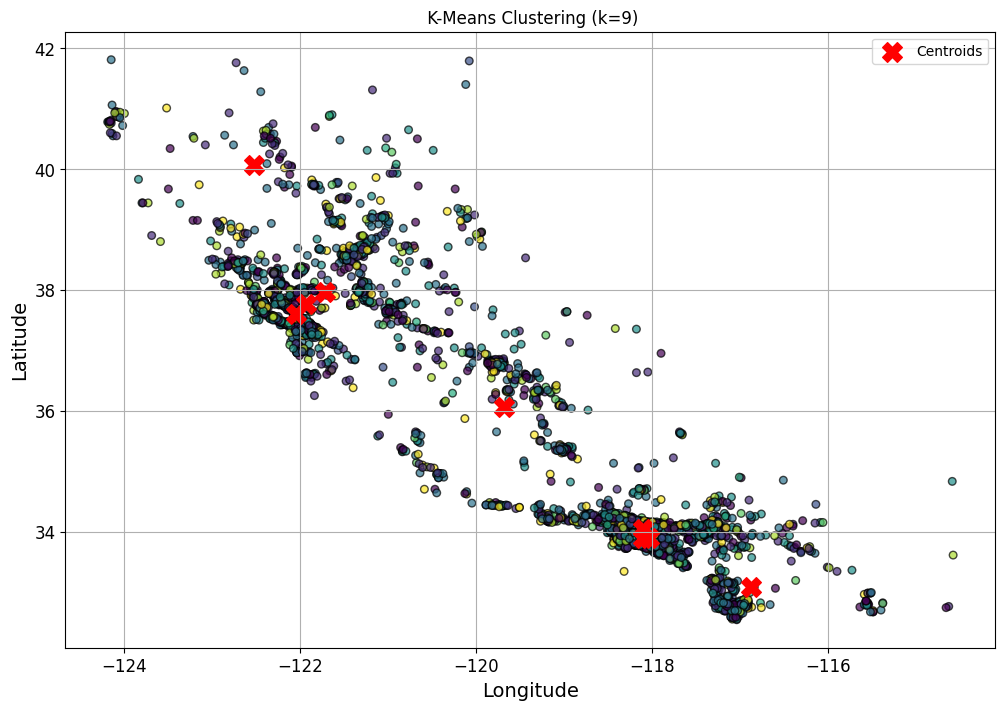


Cluster Distribution for k=9:
cluster
0    594
1    824
2    141
3    971
4    696
5     98
6    173
7    299
8    332
Name: count, dtype: int64

Cluster Feature Means for k=9:
          longitude   latitude  median_income
cluster                                      
0       -119.495589  35.625505       3.739878
1       -119.531978  35.558046       3.840045
2       -119.439929  35.542411       4.213097
3       -119.540206  35.569979       3.820629
4       -119.435259  35.547299       3.759785
5       -119.441735  35.510612       3.932671
6       -119.304740  35.370058       3.749371
7       -119.665953  35.719030       4.043819
8       -119.682380  35.755000       3.801558


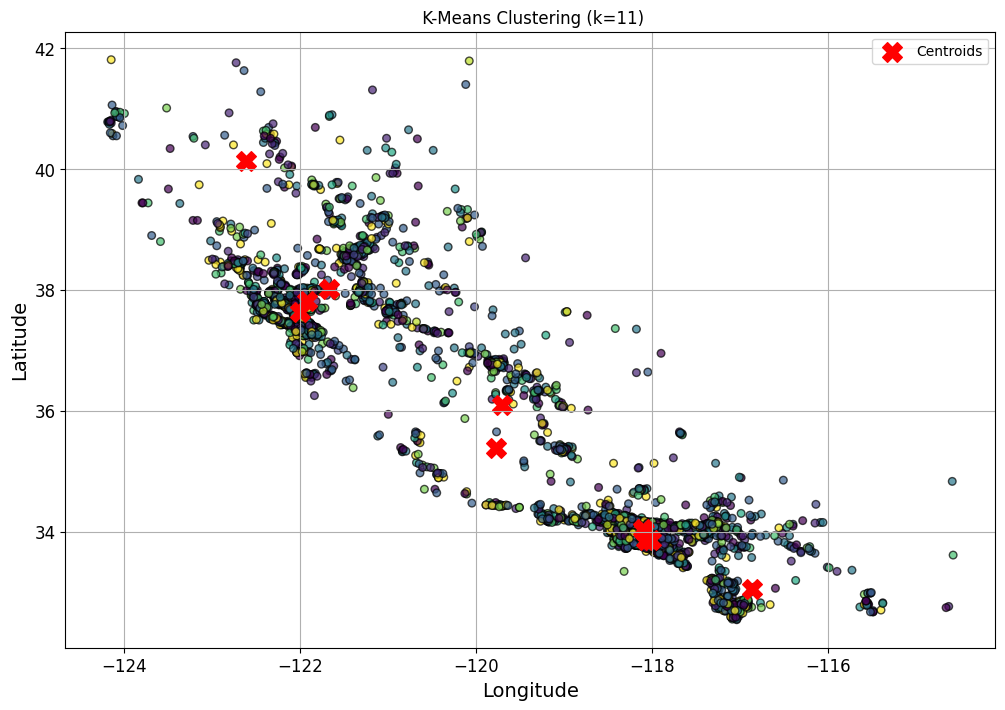


Cluster Distribution for k=11:
cluster
0     596
1     524
2     151
3     735
4     605
5     189
6     153
7     291
8     309
9      38
10    537
Name: count, dtype: int64

Cluster Feature Means for k=11:
          longitude   latitude  median_income
cluster                                      
0       -119.480067  35.586577       3.791006
1       -119.490649  35.545782       3.897600
2       -119.400530  35.481060       4.124143
3       -119.566762  35.607374       3.751966
4       -119.500860  35.638430       3.707338
5       -119.329418  35.453016       3.732028
6       -119.262680  35.288431       3.769175
7       -119.582818  35.656082       4.024871
8       -119.682880  35.754304       3.850312
9       -119.691316  35.791053       4.131761
10      -119.579702  35.553501       3.885372


In [269]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

def plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(12, 8))
    plt.scatter(X["longitude"], X["latitude"], c=labels, cmap='viridis', s=30, alpha=0.7, edgecolor='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid()
    plt.show()

def analyze_clusters(X, labels, k):
    # Create a DataFrame for analysis
    data = pd.DataFrame(X, columns=["longitude", "latitude", "median_income"])
    data['cluster'] = labels

    # Analyze the distribution of data points in each cluster
    cluster_distribution = data['cluster'].value_counts().sort_index()
    print(f"\nCluster Distribution for k={k}:")
    print(cluster_distribution)

    # Calculate the mean value of features within each cluster
    cluster_means = data.groupby('cluster').mean()
    print(f"\nCluster Feature Means for k={k}:")
    print(cluster_means)

    return cluster_distribution, cluster_means

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Test different values of k
for k in [3, 5, 7,9,11]:
    # Mini-Batch K-Means with different k
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(X_train_scaled)
    labels = kmeans.predict(X_train_scaled)
    
    # Transform centroids back to the original scale
    centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
    
    # Plot the clusters
    # Make sure to filter labels to match the size of X_test, if using a test subset
    plot_clusters(X_test, labels[:len(X_test)], centroids_original, f' K-Means Clustering (k={k})')

    # Analyze the clusters
    analyze_clusters(X_test, labels[:len(X_test)], k)

